In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)


In [ ]:
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# Converting into 1D-array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]  # https://www.cs.toronto.edu/~kriz/cifar.html

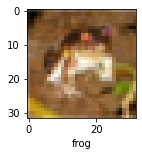

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)

In [ ]:
print(X_train.max())
print(X_test.max())

255
255


In [ ]:
# Normalizing

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               147584    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)             

In [ ]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9112 - accuracy: 0.2788
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4215 - accuracy: 0.4885
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2608 - accuracy: 0.5563
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1572 - accuracy: 0.5986
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0916 - accuracy: 0.6227
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0430 - accuracy: 0.6456
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9952 - accuracy: 0.6593
Epoch 8/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9640 - accuracy: 0.6712
Epoch 9/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9160 - accuracy: 0.6892
Epoch 10/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.885

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0160 - accuracy: 0.6850


[1.0160439014434814, 0.6850000023841858]

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:  \n", classification_report(y_test, y_pred_classes))

Classification Report:  
               precision    recall  f1-score   support

           0       0.67      0.81      0.73      1000
           1       0.72      0.89      0.80      1000
           2       0.63      0.50      0.56      1000
           3       0.49      0.48      0.48      1000
           4       0.69      0.60      0.64      1000
           5       0.59      0.57      0.58      1000
           6       0.75      0.78      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.81      0.76      0.79      1000
           9       0.75      0.74      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[9.87192616e-05, 5.68198193e-05, 5.47717512e-03, 8.25985968e-01,
        5.00032632e-03, 2.83175576e-02, 1.32059470e-01, 5.71060809e-04,
        2.07744050e-03, 3.55433411e-04],
       [3.74732004e-03, 6.87164426e-01, 3.29486147e-06, 9.48728527e-08,
        8.10181433e-08, 3.68049036e-09, 2.78276093e-06, 4.98331099e-10,
        2.95451462e-01, 1.36305578e-02],
       [4.74762395e-02, 7.75587857e-01, 1.85262482e-03, 6.28618989e-04,
        3.92313785e-04, 1.16356474e-04, 6.48962683e-04, 1.95319051e-04,
        3.92172188e-02, 1.33884400e-01],
       [9.98545647e-01, 1.48120557e-06, 3.95050301e-04, 4.71239758e-07,
        1.76424437e-05, 1.72879289e-09, 3.04185011e-09, 2.45456775e-08,
        1.03753072e-03, 2.29420607e-06],
       [4.58267069e-09, 1.36185303e-08, 1.72861633e-04, 3.47479101e-04,
        6.67973841e-03, 1.66552254e-05, 9.92783070e-01, 1.06352566e-07,
        8.64818772e-11, 2.62188671e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

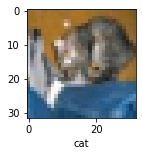

In [ ]:
plot_sample(X_test, y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'